# Microsoft Movie Analysis

**Author:** Lili Beit
***

## Overview

Microsoft wants to enter the movie business as a creator of original content.  My task is to advise them on how to make popular movies that will draw subscribers to its new streaming video service.  I used data from IMDb, the Internet Movie Database, to investigate three questions:

1. Which movie genres are the most popular?
2. Who are the top actors and directors in the popular genres?
3. Does the length of a movie affect its ratings and popularity?

To measure a film's popularity, I used the product of its average rating and the number of people who rated it.  I discovered that the most popular movie genres among IMDb users are Action, Sci-Fi, and Adventure.  I then found the 20 actors and directors who have made the most popular movies in these genres.  I also found that a longer runtime is correlated with increased popularity.

To successfully break into the streaming movie business, Microsoft should focus on Action, Sci-Fi, and Adventure movies, and should recruit actors and directors with a successful track record in these genres.  They should also make movies that are longer than average - around 109 minutes.


## Business Problem

Microsoft sees big tech companies such as Amazon, Netflix, and Hulu successfully drawing customers with streaming video services featuring original content, and so has decided to enter the streaming space.  Microsoft hopes its existing subscription-based customers will pay more for access to movie content.  They hope to lure subscribers with original movies, but don't know anything about how to make movies that are highly rated and appeal to a wide audience.  They need to generate a few "big win" movies to kickstart their entry into the streaming arena.


## Data Understanding

To analyze this problem, I used data from IMDb, the Internet Movie Database.  IMDb contains information on over 140,000 movies, including actors, genres, and ratings.  While IMDb does collect information from filmakers, the bulk of its data are submitted by  individuals in the movie industry and visitors to the IMDb website.  IMDb routinely checks its data for accuracy and welcomes corrections from its users.

IMDb users are a good proxy for the customers Microsoft seeks to recruit: people who are internet-savvy and passionate about movies.  Thus, the number of ratings and average rating for movies on IMDb are suitable gauges for potential customers' reactions to Microsoft's new movies.

## Data Preparation

Using the IMDb ratings data, I created a new variable, Popularity, which is simply the product of a movie's average rating and the number of people who rated it.  This variable combines the size of the movie's audience with its average rating by those viewers.

I restricted the data to movies with over 100 user ratings, since ratings from a small sample of users may not match the reaction of a larger audience.  I also limited the data to movies made in the last 20 years (in 2000 or later), since these provide the best data on currently available actors and directors.

After implementing the above restrictions, I arrived at a sample of over 28,000 movies.

In [2]:
# Import standard packages
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#import Box Office Mojo gross data
bom_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz',compression='gzip')
bom_df.info()
bom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#import IMDB actor/crew name data
imdb_name_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz',compression='gzip')
imdb_name_df.info()
imdb_name_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
#import IMDB title aka data
imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz', compression='gzip')
imdb_title_akas_df.info()
imdb_title_akas_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
#import IMDB title/basic info data
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_basics_df.info()
imdb_title_basics_df.head()
imdb_title_basics_df.describe()
# looks like this only contains movies since 2010
# there are a couple of impossible values for year and runtime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
#import IMDB title/crew data
#not necessary for this analysis
imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz', compression='gzip')
imdb_title_crew_df.info()
imdb_title_crew_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
#import IMDB principals data
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz', compression='gzip')
imdb_title_principals_df.info()
imdb_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
#import IMDB ratings data
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings_df.info()
imdb_title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
# import Rotten Tomatoes movie data
# this data has an issue with delimiters which is throwing this error:
# ParserError: Error tokenizing data. C error
# Encoding is latin1 and need to specify tab instead of comma delimiter

rt_info_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz',delimiter = '\t',encoding='latin1', 
                         compression='gzip')
rt_info_df.info()
rt_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
# import Rotten Tomatoes reviews
# this data has an issue with delimiters which is throwing this error:
# ParserError: Error tokenizing data. C error
# Encoding is latin1 and need to specify tab instead of comma delimiter
rt_reviews_df = pd.read_csv('data/zippedData/rt.reviews.tsv.gz',delimiter = '\t',encoding='latin1', compression='gzip')
rt_reviews_df.info()
rt_reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [12]:
# import The Movie Database (TMDb) data
tmdb_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tmdb_df.info()
tmdb_df.head()

#print(tmdb_df.loc[(tmdb_df['title']).str.contains("'")]) #checking to see if apostrophes are there. Yes they are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
# import TN budget data

tn_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', compression='gzip')
tn_budgets_df.info()
tn_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# create imdb df with titles, basic info, and ratings
imdb_df = imdb_title_basics_df.merge(imdb_title_ratings_df,how='left', on='tconst')
#146144 entries

#drop unnecessary columns
imdb_df.drop(columns=['original_title'], inplace=True)

#drop movies made prior to 2000
imdb_df = imdb_df.loc[imdb_df['start_year'] >= 2000]
#no change in number of entries, since min year is 2010

#drop rows with number of rating votes < 100
imdb_df = imdb_df.loc[imdb_df['numvotes'] >= 15]
# 28753 entries

#add popularity column (product of 'averagerating' and 'numvotes')
imdb_df['popularity'] = (imdb_df['averagerating'])*imdb_df['numvotes']

#reset index
imdb_df.reset_index(inplace=True, drop=True)

imdb_df.info() # some movies are missing runtime or genres - drop these later
imdb_df.describe()
imdb_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54684 entries, 0 to 54683
Data columns (total 8 columns):
tconst             54684 non-null object
primary_title      54684 non-null object
start_year         54684 non-null int64
runtime_minutes    50787 non-null float64
genres             54380 non-null object
averagerating      54684 non-null float64
numvotes           54684 non-null float64
popularity         54684 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,539.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,309.6
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,31167.3
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,773.5
4,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0,131.2


## Question 1: Which movie genres are the most popular?

To answer this question, I excluded 20 movies which have no assigned genres in IMDb.  They represent less than 0.1 per cent of the sample, so excluding them will not greatly impact the analysis.

Since many movies have more than one genre listed, I created new variables for each genre category, showing True or False for each movie.  I then found the average popularity for each genre.  Adventure, Sci-Fi, and Action emerged as the three most popular genres.

In [15]:
# create df that excludes entries where 'genres' is null
# only 20 movies have no values for 'genres'
genre_ratings_df = imdb_df.dropna(subset=['genres'])

#reset index
genre_ratings_df.reset_index(inplace=True, drop=True)

#drop unnecessary columns
genre_ratings_df.drop(columns=['runtime_minutes'], inplace=True)

genre_ratings_df.info()
genre_ratings_df.describe()
genre_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 7 columns):
tconst           54380 non-null object
primary_title    54380 non-null object
start_year       54380 non-null int64
genres           54380 non-null object
averagerating    54380 non-null float64
numvotes         54380 non-null float64
popularity       54380 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tconst,primary_title,start_year,genres,averagerating,numvotes,popularity
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0,539.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0,309.6
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,31167.3
3,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0,773.5
4,tt0112502,Bigfoot,2017,"Horror,Thriller",4.1,32.0,131.2


In [17]:
#create list of unique IMDB genres

#first, get unique combinations of genres from genres column
genres_array = genre_ratings_df['genres'].unique() 

#next, split combinations into individual genres
genres_list = []

for x in genres_array:
    xlist = x.split(',')
    genres_list = genres_list + xlist

#finally, get unique genres
unique_genres_list = []    

for y in genres_list:
    if y not in unique_genres_list:
        unique_genres_list.append(y)

unique_genres_list = sorted(unique_genres_list)

unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [18]:
#add genre columns to genre_ratings_df as columns

for x in unique_genres_list:
    genre_ratings_df[x] = ""
    for y in range(0, len(genre_ratings_df)):
        genre_ratings_df[x][y] = np.where((x in genre_ratings_df['genres'][y]), True, False)

#The above works, but got a pandas warning that using the syntax below would be faster.  
#Tried, but it didn't work, probably because my second one is a row index, not a name
#     dfmi.loc[:, ('one', 'second')]
# for x in range(0, len(genre_ratings_df)):
#     genre_ratings_df.loc[:, ('Drama', [x])] = np.where(('Drama' in genre_ratings_df.loc[:, ('genres', [x])]), True, False)
# maybe need to do something with loc and iloc - ask for help
# can also try to speed it up by assignment numbers to genres?

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

In [19]:
genre_ratings_df.head(200)

,tconst,primary_title,start_year,genres,averagerating,numvotes,popularity,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0,539.0,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0,309.6,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,31167.3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0,773.5,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0112502,Bigfoot,2017,"Horror,Thriller",4.1,32.0,131.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
5,tt0137204,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1,263.0,2130.3,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,tt0146592,Pál Adrienn,2010,Drama,6.8,451.0,3066.8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,tt0154039,So Much for Justice!,2010,History,4.6,64.0,294.4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,tt0159369,Cooper and Hemingway: The True Gen,2013,Documentary,7.6,53.0,402.8,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,tt0162942,Children of the Green Dragon,2010,Drama,6.9,120.0,828.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# create a function for average popularity by genre

# testing code:
# test = genre_ratings_df.loc[genre_ratings_df['Action'] == True]
# test['popularity'].sum()/len(test) #175456.49868951613
# (genre_ratings_df.loc[genre_ratings_df['Action'] == True]['popularity'].sum())/(len(genre_ratings_df.loc[genre_ratings_df['Action'] == True])) #175456.49868951613

def get_avg_popularity(column):
    """Calculate the average popularity for one of the genre columns in the genre_ratings_df DataFrame."""
    sum_popularity = (genre_ratings_df.loc[column == True]['popularity'].sum())
    len_popularity = (len(genre_ratings_df.loc[column == True]))
    return sum_popularity/len_popularity
    
get_avg_popularity(genre_ratings_df['Action'])

119847.10289007396

In [21]:
#create list of average popularity values using list of unique genres

avg_popularity_values = []

for g in unique_genres_list:
    p = get_avg_popularity(genre_ratings_df[g])
    avg_popularity_values.append(p)
    
avg_popularity_values

[119847.10289007396,
 175.6,
 193113.19132271694,
 77606.5953375087,
 59820.426787699136,
 35015.7037091572,
 70508.44000517865,
 3295.665958474167,
 34817.8748381777,
 22285.02747126437,
 103699.08062426385,
 19387.199999999997,
 29251.91780821918,
 23228.669942839,
 25146.791106405504,
 19466.408349900594,
 68129.6942408377,
 2782.1156156156158,
 227.8,
 32662.798143767064,
 169274.0421693414,
 30368.28501664817,
 47460.94608429343,
 28887.04316109422,
 81577.6853982301]

In [22]:
# create dataframe of genres and average popularity values

genre_avg_pop_df = pd.DataFrame()

genre_avg_pop_df['genre'] = unique_genres_list
genre_avg_pop_df['avg_popularity'] = avg_popularity_values

genre_avg_pop_df = genre_avg_pop_df.sort_values(by ='avg_popularity', ascending=False)
genre_avg_pop_df

,genre,avg_popularity
2,Adventure,193113.191323
20,Sci-Fi,169274.042169
0,Action,119847.102890
10,Fantasy,103699.080624
24,Western,81577.685398
3,Animation,77606.595338
6,Crime,70508.440005
16,Mystery,68129.694241
4,Biography,59820.426788
22,Thriller,47460.946084


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

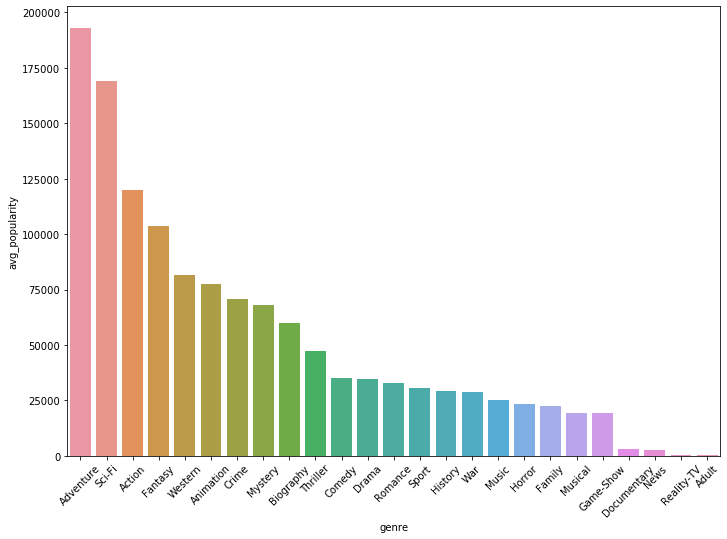

In [23]:
# plot genres by popularity

fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(x=genre_avg_pop_df['genre'], y=genre_avg_pop_df['avg_popularity'])
ax.figsize=(20,10)
plt.xticks(rotation=45)


In [152]:
# I wonder if average ratings follow the same pattern as popularity
# create a function for average rating by genre

def get_avg_rating(column):
    """Calculate the average rating of one of the genre columns in the genre_ratings_df DataFrame."""
    sum_rating = (genre_ratings_df.loc[column == True]['averagerating'].sum())
    len_rating = (len(genre_ratings_df.loc[column == True]))
    return sum_rating/len_rating
    
get_avg_rating(genre_ratings_df['Action'])

5.55851814516129

In [153]:
#create list of average ratings using list of genres

avg_rating_values = []

for g in unique_genres_list:
    r = get_avg_rating(genre_ratings_df[g])
    avg_rating_values.append(r)
    
avg_rating_values

[5.55851814516129,
 2.0,
 5.782115482881962,
 6.309132947976878,
 6.88384668035592,
 5.703273111215392,
 5.915129573170732,
 7.086683630195081,
 6.161747446207347,
 5.972755905511811,
 5.5635658914728685,
 5.6,
 6.668123138033763,
 4.666948436179205,
 6.570063694267516,
 6.216532258064516,
 5.628697293895532,
 7.130088495575221,
 4.8,
 5.98169784172662,
 5.077128116938951,
 6.600386847195358,
 5.380505415162455,
 6.2625615763546785,
 5.397560975609757]

In [31]:
# create dataframe of genres and average ratings

genre_avg_ratings_df = pd.DataFrame()

genre_avg_ratings_df['genre'] = unique_genres_list
genre_avg_ratings_df['averagerating'] = avg_rating_values

genre_avg_ratings_df = genre_avg_ratings_df.sort_values(by ='averagerating', ascending=False)
genre_avg_ratings_df

,genre,averagerating
17,News,7.130088
7,Documentary,7.086684
4,Biography,6.883847
12,History,6.668123
21,Sport,6.600387
14,Music,6.570064
3,Animation,6.309133
23,War,6.262562
15,Musical,6.216532
8,Drama,6.161747


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

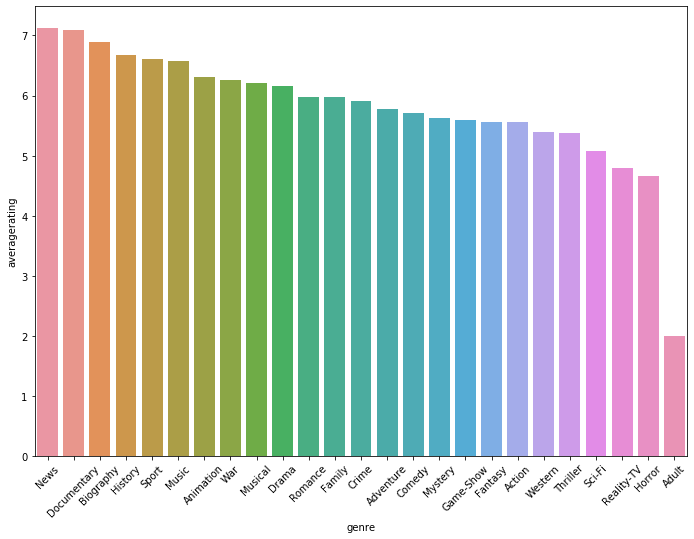

In [154]:
# plot genres by average ratings
# no, ratings do not follow same pattern as popularity
# popularity is a more useful measure since it takes into account the number of people interested in the genre

fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(x=genre_avg_ratings_df['genre'], y=genre_avg_ratings_df['averagerating'])
ax.figsize=(20,10)
plt.xticks(rotation=45)


### Does runtime affect ratings?

In [14]:
# create runtime vs ratings df
runtime_ratings_df = imdb_title_basics_df.merge(imdb_title_ratings_df,how='left', on='tconst')

#drop unnecessary columns
runtime_ratings_df.drop(columns=['original_title','genres'], inplace=True)

# drop rows with no ratings or runtime
runtime_ratings_df.dropna(subset=['averagerating','runtime_minutes'], inplace=True)

#drop rows with number of votes < 100
runtime_ratings_df = runtime_ratings_df.loc[runtime_ratings_df['numvotes'] >= 100]

#add Popularity column (product of 'averagerating' and 'numvotes')
runtime_ratings_df['popularity'] = (runtime_ratings_df['averagerating'])*runtime_ratings_df['numvotes']

# a few movies have runtime over 4 hours - drop these
runtime_ratings_df = runtime_ratings_df.loc[runtime_ratings_df['runtime_minutes'] <= 240]

runtime_ratings_df.info()
# runtime_ratings_df.describe()
runtime_ratings_df.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27954 entries, 2 to 146122
Data columns (total 7 columns):
tconst             27954 non-null object
primary_title      27954 non-null object
start_year         27954 non-null int64
runtime_minutes    27954 non-null float64
averagerating      27954 non-null float64
numvotes           27954 non-null float64
popularity         27954 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


,tconst,primary_title,start_year,runtime_minutes,averagerating,numvotes,popularity
2,tt0069049,The Other Side of the Wind,2018,122.0,6.9,4517.0,31167.3
4,tt0100275,The Wandering Soap Opera,2017,80.0,6.5,119.0,773.5
7,tt0137204,Joe Finds Grace,2017,83.0,8.1,263.0,2130.3
10,tt0146592,Pál Adrienn,2010,136.0,6.8,451.0,3066.8
13,tt0162942,Children of the Green Dragon,2010,89.0,6.9,120.0,828.0
15,tt0176694,The Tragedy of Man,2011,160.0,7.8,584.0,4555.2
20,tt0249516,Foodfight!,2012,91.0,1.9,8248.0,15671.2
23,tt0255820,Return to Babylon,2013,75.0,5.9,123.0,725.7
30,tt0285252,Life's a Beach,2012,100.0,3.9,219.0,854.1
32,tt0293069,Dark Blood,2012,86.0,6.6,1053.0,6949.8


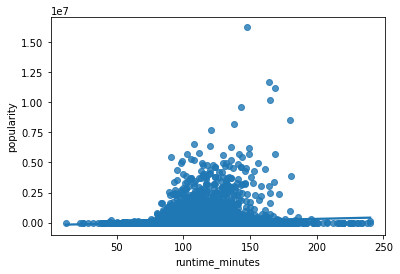

In [15]:
#plot runtime vs popularity, include regression line

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_ratings_df)
fig

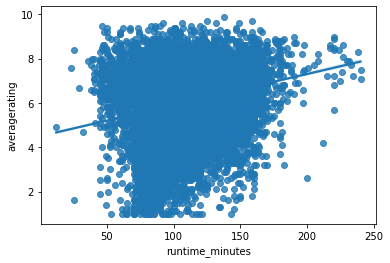

In [16]:
#plot runtime vs popularity

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_ratings_df)
fig

In [17]:
# find top 5% of movies by Popularity

top_movies = runtime_ratings_df.sort_values(by=['popularity'], ascending=False)
top_movies = top_movies[0:int(len(runtime_ratings_df)*0.05)]

# top_movies.info()
# top_movies.describe()
top_movies.sort_values(by='popularity')

,tconst,primary_title,start_year,runtime_minutes,averagerating,numvotes,popularity
41914,tt2515034,The Gunman,2015,115.0,5.8,36053.0,209107.4
14959,tt1727770,Absolutely Anything,2015,85.0,6.0,34859.0,209154.0
8107,tt1480656,Cosmopolis,2012,109.0,5.0,41897.0,209485.0
11767,tt1641638,The Legend Is Born: Ip Man,2010,100.0,7.1,29529.0,209655.9
91745,tt5304992,Set It Up,2018,105.0,6.5,32261.0,209696.5
...,...,...,...,...,...,...,...
356,tt0848228,The Avengers,2012,143.0,8.1,1183655.0,9587605.5
20342,tt1853728,Django Unchained,2012,165.0,8.4,1211405.0,10175802.0
311,tt0816692,Interstellar,2014,169.0,8.6,1299334.0,11174272.4
6900,tt1345836,The Dark Knight Rises,2012,164.0,8.4,1387769.0,11657259.6


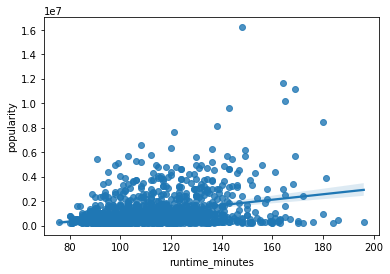

In [18]:
fig = sns.regplot(x="runtime_minutes", y="popularity", data=top_movies)
fig

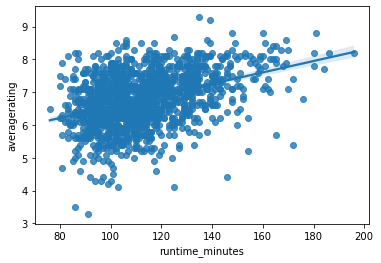

In [19]:
fig = sns.regplot(x="runtime_minutes", y="averagerating", data=top_movies)
fig

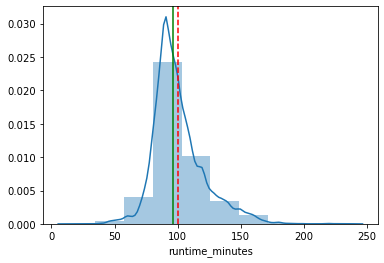

In [20]:
# histogram for runtime of all movies

fig = sns.distplot(a=runtime_ratings_df['runtime_minutes'], bins=10)

#plot mean, median, mode

mean=runtime_ratings_df['runtime_minutes'].mean()
median=runtime_ratings_df['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--')
fig.axvline(median, color='g', linestyle='-')

fig

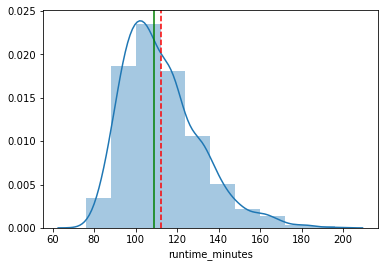

In [21]:
# histogram for runtime of top 0.05% of movies by popularity

fig = sns.distplot(a=top_movies['runtime_minutes'], bins=10)

mean=top_movies['runtime_minutes'].mean()
median=top_movies['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--')
fig.axvline(median, color='g', linestyle='-')

fig

In [85]:
print(runtime_ratings_df['runtime_minutes'].mean(),
      runtime_ratings_df['runtime_minutes'].median(),
      top_movies['runtime_minutes'].mean(),
      top_movies['runtime_minutes'].median())

100.61003791943908 96.0 112.37580529706514 109.0


### Does genre affect popularity?

In [22]:
# create runtime vs ratings df
genre_ratings_df = imdb_title_basics_df.merge(imdb_title_ratings_df,how='left', on='tconst')

#drop unnecessary columns
genre_ratings_df.drop(columns=['primary_title','runtime_minutes'], inplace=True)

# drop rows with no ratings or genres
genre_ratings_df.dropna(subset=['averagerating','genres'], inplace=True)

#drop rows with number of votes < 100
genre_ratings_df = genre_ratings_df.loc[genre_ratings_df['numvotes'] >= 100]

#add Popularity column (product of 'averagerating' and 'numvotes')
genre_ratings_df['popularity'] = (genre_ratings_df['averagerating'])*genre_ratings_df['numvotes']

#reset index
genre_ratings_df.reset_index(inplace=True)

genre_ratings_df.info()
# genre_ratings_df.describe()
genre_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28733 entries, 0 to 28732
Data columns (total 8 columns):
index             28733 non-null int64
tconst            28733 non-null object
original_title    28733 non-null object
start_year        28733 non-null int64
genres            28733 non-null object
averagerating     28733 non-null float64
numvotes          28733 non-null float64
popularity        28733 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.8+ MB


,index,tconst,original_title,start_year,genres,averagerating,numvotes,popularity
0,2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,31167.3
1,4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119.0,773.5
2,7,tt0137204,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1,263.0,2130.3
3,10,tt0146592,Pál Adrienn,2010,Drama,6.8,451.0,3066.8
4,13,tt0162942,A zöld sárkány gyermekei,2010,Drama,6.9,120.0,828.0


In [23]:
#create list of unique IMDB genres
genres_array = genre_ratings_df['genres'].unique()

genres_list = []

for x in genres_array:
    xlist = x.split(',')
    genres_list = genres_list + xlist

unique_genres_list = []    

for y in genres_list:
    if y not in unique_genres_list:
        unique_genres_list.append(y)

unique_genres_list = sorted(unique_genres_list)

unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [24]:
#add genres to genre_ratings_df as columns

for x in unique_genres_list:
    genre_ratings_df[x] = ""
    for y in range(0, len(genre_ratings_df)):
        genre_ratings_df[x][y] = np.where((x in genre_ratings_df['genres'][y]), True, False)

#The above works, but got a pandas warning that using the syntax below would be faster.  
#Tried, but it didn't work, probably because my second one is a row index, not a name
#     dfmi.loc[:, ('one', 'second')]
# for x in range(0, len(genre_ratings_df)):
#     genre_ratings_df.loc[:, ('Drama', [x])] = np.where(('Drama' in genre_ratings_df.loc[:, ('genres', [x])]), True, False)
# maybe need to do something with loc and iloc - ask for help
# can also try to speed it up by assignment numbers to genres?

genre_ratings_df.head(10)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,tconst,original_title,start_year,genres,averagerating,numvotes,popularity,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,31167.3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119.0,773.5,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,7,tt0137204,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1,263.0,2130.3,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10,tt0146592,Pál Adrienn,2010,Drama,6.8,451.0,3066.8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,13,tt0162942,A zöld sárkány gyermekei,2010,Drama,6.9,120.0,828.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,15,tt0176694,Az ember tragédiája,2011,"Animation,Drama,History",7.8,584.0,4555.2,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6,20,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248.0,15671.2,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,21,tt0250404,Godfather,2012,"Crime,Drama",6.7,236.0,1581.2,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,23,tt0255820,Return to Babylon,2013,"Biography,Comedy,Drama",5.9,123.0,725.7,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,26,tt0263814,On kadin,2019,Drama,7.1,100.0,710.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# create a function for average popularity by genre

# testing code:
# test = genre_ratings_df.loc[genre_ratings_df['Action'] == True]
# test['popularity'].sum()/len(test) #175456.49868951613
# (genre_ratings_df.loc[genre_ratings_df['Action'] == True]['popularity'].sum())/(len(genre_ratings_df.loc[genre_ratings_df['Action'] == True])) #175456.49868951613

def get_avg_popularity(column):
    sum_popularity = (genre_ratings_df.loc[column == True]['popularity'].sum())
    len_popularity = (len(genre_ratings_df.loc[column == True]))
    return sum_popularity/len_popularity
    
get_avg_popularity(genre_ratings_df['Action'])

175456.49868951613

In [26]:
#create list of average popularity values using list of genres

avg_popularity_values = []

for g in unique_genres_list:
    p = get_avg_popularity(genre_ratings_df[g])
    avg_popularity_values.append(p)
    
type(avg_popularity_values)
avg_popularity_values

[175456.49868951613,
 256.0,
 303479.2470618293,
 128749.3447398844,
 110275.36249144422,
 58411.282519943685,
 103645.67252286588,
 9115.325756290642,
 60977.70791856843,
 45503.07149606299,
 170453.2729651163,
 19387.199999999997,
 56988.3411122145,
 41055.69997182305,
 50141.30530785562,
 39196.74274193548,
 106318.83492762745,
 7630.2,
 820.8,
 51493.43769784173,
 262875.8301805675,
 52707.76228239845,
 73295.9898465704,
 46637.233743842364,
 149707.53658536586]

In [27]:
# create dataframe of genres and average popularity values

genre_avg_pop_df = pd.DataFrame()

genre_avg_pop_df['genre'] = unique_genres_list
genre_avg_pop_df['avg_popularity'] = avg_popularity_values

genre_avg_pop_df = genre_avg_pop_df.sort_values(by ='avg_popularity', ascending=False)
genre_avg_pop_df

,genre,avg_popularity
2,Adventure,303479.247062
20,Sci-Fi,262875.830181
0,Action,175456.498690
10,Fantasy,170453.272965
24,Western,149707.536585
3,Animation,128749.344740
4,Biography,110275.362491
16,Mystery,106318.834928
6,Crime,103645.672523
22,Thriller,73295.989847


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

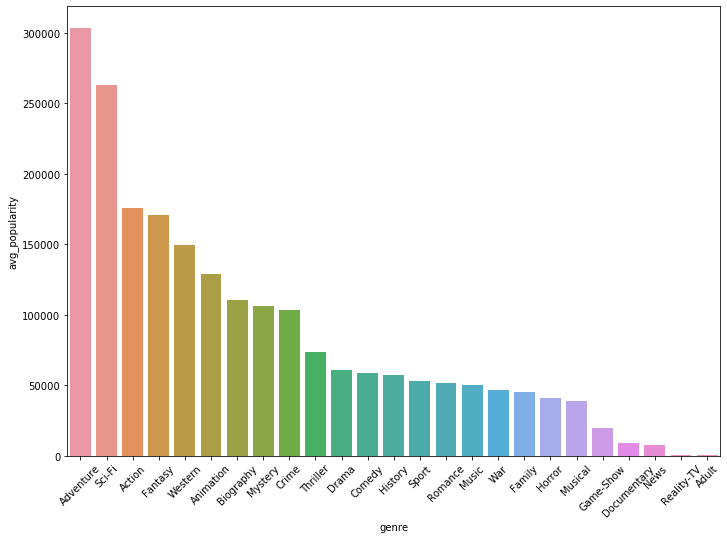

In [28]:
# plot genres by popularity

fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(x=genre_avg_pop_df['genre'], y=genre_avg_pop_df['avg_popularity'])
ax.figsize=(20,10)
plt.xticks(rotation=45)


In [29]:
# I wonder if average ratings follow the same pattern as popularity
# create a function for average rating by genre

def get_avg_rating(column):
    sum_rating = (genre_ratings_df.loc[column == True]['averagerating'].sum())
    len_rating = (len(genre_ratings_df.loc[column == True]))
    return sum_rating/len_rating
    
get_avg_rating(genre_ratings_df['Action'])

5.55851814516129

In [30]:
#create list of average ratings using list of genres

avg_rating_values = []

for g in unique_genres_list:
    r = get_avg_rating(genre_ratings_df[g])
    avg_rating_values.append(r)
    
avg_rating_values

[5.55851814516129,
 2.0,
 5.782115482881962,
 6.309132947976878,
 6.88384668035592,
 5.703273111215392,
 5.915129573170732,
 7.086683630195081,
 6.161747446207347,
 5.972755905511811,
 5.5635658914728685,
 5.6,
 6.668123138033763,
 4.666948436179205,
 6.570063694267516,
 6.216532258064516,
 5.628697293895532,
 7.130088495575221,
 4.8,
 5.98169784172662,
 5.077128116938951,
 6.600386847195358,
 5.380505415162455,
 6.2625615763546785,
 5.397560975609757]

In [31]:
# create dataframe of genres and average ratings

genre_avg_ratings_df = pd.DataFrame()

genre_avg_ratings_df['genre'] = unique_genres_list
genre_avg_ratings_df['averagerating'] = avg_rating_values

genre_avg_ratings_df = genre_avg_ratings_df.sort_values(by ='averagerating', ascending=False)
genre_avg_ratings_df

,genre,averagerating
17,News,7.130088
7,Documentary,7.086684
4,Biography,6.883847
12,History,6.668123
21,Sport,6.600387
14,Music,6.570064
3,Animation,6.309133
23,War,6.262562
15,Musical,6.216532
8,Drama,6.161747


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

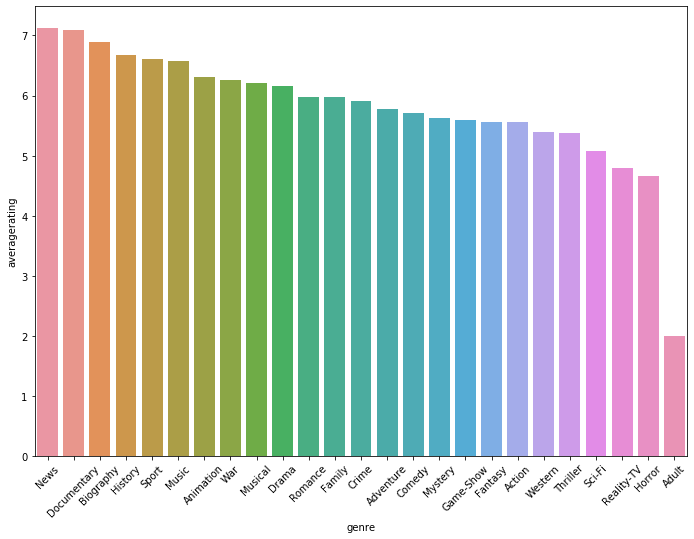

In [32]:
# plot genres by average ratings
# no, ratings do not follow same pattern as popularity
# popularity is a more useful measure since it takes into account the number of people interested in the genre

fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(x=genre_avg_ratings_df['genre'], y=genre_avg_ratings_df['averagerating'])
ax.figsize=(20,10)
plt.xticks(rotation=45)


### Which actors, directors, cinematographers and designers are associated with popular movies?

In [33]:
# which actors, directors, production designers, cinematographers are associated with the most popular movies?
imdb_title_principals_df['category'].value_counts()
# imdb_title_principals_df.head()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [34]:
# use df of the top 0.05% of movies by popularity
# left join principals df then look at top principals

top_movies.describe()
top_movies.head()

top_movies_principals = top_movies.merge(imdb_title_principals_df, on='tconst')
#inner and left joins yield same result, so all movies do have some principals

#drop unnecessary columns
top_movies_principals.drop(columns=['runtime_minutes','ordering','job','characters'], inplace=True)

#drop rows with unnecessary category values
top_movies_principals = top_movies_principals.loc[top_movies_principals['category'].isin (['actor',
                                                                                           'actress',
                                                                                           'director',
                                                                                           'cinematographer'])]


top_movies_principals.head()
# top_movies_principals.describe()
# top_movies_principals.info()

,tconst,primary_title,start_year,averagerating,numvotes,popularity,nconst,category
1,tt1375666,Inception,2010,8.8,1841066.0,16201380.8,nm0000138,actor
2,tt1375666,Inception,2010,8.8,1841066.0,16201380.8,nm0330687,actor
3,tt1375666,Inception,2010,8.8,1841066.0,16201380.8,nm0680983,actress
4,tt1375666,Inception,2010,8.8,1841066.0,16201380.8,nm0913822,actor
5,tt1375666,Inception,2010,8.8,1841066.0,16201380.8,nm0634240,director


In [35]:
# count movies by principal

principals_pivot = top_movies_principals.pivot_table(values='primary_title', index='nconst', aggfunc='count', margins_name='movie_count')

#get a sense of how many top movies the top principals are in
principals_pivot.sort_values(by='primary_title', ascending=False).describe()

#let's look at principals with 3 or more top movies
principals_pivot = principals_pivot.loc[principals_pivot['primary_title'] >= 3].sort_values(by='primary_title', ascending=False)
principals_pivot.info()
principals_pivot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 758 entries, nm0000242 to nm6819854
Data columns (total 1 columns):
primary_title    758 non-null int64
dtypes: int64(1)
memory usage: 11.8+ KB


,primary_title
nconst,
nm0000242,20
nm0136797,18
nm1055413,18
nm0425005,17
nm0447695,16


In [36]:
#join principals names and professions

principals_list = principals_pivot.merge(imdb_name_df, on='nconst', how='left')
principals_list = principals_list.drop(columns=['known_for_titles','death_year']) #remove unnecessary columns
#principals_list.duplicated().sum() #no duplicates

principals_list
#now we have a list of 759 people who are associated with popular movies whom Microsoft can recruit

,nconst,primary_title,primary_name,birth_year,primary_profession
0,nm0000242,20,Mark Wahlberg,1971.0,"producer,actor,soundtrack"
1,nm0136797,18,Steve Carell,1962.0,"actor,producer,writer"
2,nm1055413,18,Michael Fassbender,1977.0,"actor,producer,soundtrack"
3,nm0425005,17,Dwayne Johnson,1972.0,"actor,producer,soundtrack"
4,nm0447695,16,Anna Kendrick,1985.0,"actress,soundtrack,music_department"
...,...,...,...,...,...
753,nm0440458,3,Jake Kasdan,1974.0,"producer,director,actor"
754,nm0396924,3,Carice van Houten,1976.0,"actress,producer,soundtrack"
755,nm0393799,3,Tom Hooper,1972.0,"director,producer,writer"
756,nm0376716,3,Christina Hendricks,1975.0,"actress,soundtrack"


In [51]:
#for context, add back in movie titles and genres

#add back movie titles
principals_movies_list = principals_list.merge(top_movies_principals, on='nconst', how='left')
# principals_movies_list.head(21)
# principals_movies_list.info() #length = 3977

#add back movie genres
principals_movies_list = principals_movies_list.merge(imdb_title_basics_df, on='tconst')
# principals_movies_list.info() #length still 3977

#remove unnecessary columns
principals_movies_list.drop(columns=['primary_profession','primary_title','original_title','start_year_y','runtime_minutes'], inplace=True)

#sort on movie count, principal name, movie year
principals_movies_list.sort_values(by=['primary_title_x','primary_name','start_year_x'], ascending=False, inplace=True)

#rename columns for clarity (poor Microsoft)
principals_movies_list.rename(columns = {'nconst': 'Principal IMDB ID',
                                         'primary_title_x': 'Total Movie Count',
                                         'primary_name': 'Principal Name',
                                         'birth_year': 'Principal Birth Year',
                                         'tconst': 'Movie IMDB ID',
                                         'primary_title_y': 'Movie Title',
                                         'start_year_x': 'Movie Year',
                                         'averagerating': 'Movie Average Rating',
                                         'numvotes': 'Total Rating Votes',
                                         'popularity': 'Movie Popularity (Rating x Votes)',
                                         'category': 'Principal Role in Movie',
                                         'genres': 'Movie Genres'}, inplace=True)

#recorder columns logically 
principals_movies_list = principals_movies_list[['Principal Name',
                                                'Principal Birth Year',
                                                'Principal IMDB ID',
                                                'Total Movie Count',
                                                'Movie Title',
                                                'Movie Year',
                                                'Movie IMDB ID',
                                                'Principal Role in Movie',
                                                'Movie Average Rating',
                                                'Total Rating Votes',
                                                'Movie Popularity (Rating x Votes)',
                                                'Movie Genres']
                                               ]


#replace "actress" values with "actor"
principals_movies_list['Principal Role in Movie'].replace('actress','actor',inplace=True)

#reset index
principals_movies_list.reset_index(drop=True, inplace=True)

principals_movies_list

,Principal Name,Principal Birth Year,Principal IMDB ID,Total Movie Count,Movie Title,Movie Year,Movie IMDB ID,Principal Role in Movie,Movie Average Rating,Total Rating Votes,Movie Popularity (Rating x Votes),Movie Genres
0,Mark Wahlberg,1971.0,nm0000242,20,Instant Family,2018,tt7401588,actor,7.4,46728.0,345787.2,"Comedy,Drama"
1,Mark Wahlberg,1971.0,nm0000242,20,Mile 22,2018,tt4560436,actor,6.1,47862.0,291958.2,"Action,Adventure,Thriller"
2,Mark Wahlberg,1971.0,nm0000242,20,Transformers: The Last Knight,2017,tt3371366,actor,5.2,119007.0,618836.4,"Action,Adventure,Sci-Fi"
3,Mark Wahlberg,1971.0,nm0000242,20,All the Money in the World,2017,tt5294550,actor,6.8,60303.0,410060.4,"Biography,Crime,Drama"
4,Mark Wahlberg,1971.0,nm0000242,20,Daddy's Home Two,2017,tt5657846,actor,6.0,48478.0,290868.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
3968,Adam Devine,1983.0,nm2796745,3,When We First Met,2018,tt5783956,actor,6.4,34781.0,222598.4,"Comedy,Fantasy,Romance"
3969,Adam Devine,1983.0,nm2796745,3,Mike and Dave Need Wedding Dates,2016,tt2823054,actor,6.0,74849.0,449094.0,"Adventure,Comedy,Romance"
3970,Aaron Paul,1979.0,nm0666739,3,Triple 9,2016,tt1712261,actor,6.3,60369.0,380324.7,"Crime,Thriller"
3971,Aaron Paul,1979.0,nm0666739,3,Eye in the Sky,2015,tt2057392,actor,7.3,72301.0,527797.3,"Drama,Thriller,War"


In [75]:
# create a function to search by principal's role and movie genre, and choose number of records

def find_principals(role, genre, num_people):
    df = principals_movies_list.loc[principals_movies_list['Principal Role in Movie'] == role]
    df = df.loc[df['Movie Genres'].str.contains(genre)]
    df = df[['Principal Name','Movie Title']]
    df = df.pivot_table(values='Movie Title', 
                        index=['Principal Name'], 
                        aggfunc='count',
                        margins=False)
    df.sort_values(by=['Movie Title'], ascending=False, inplace=True)
    df.rename(columns={'Movie Title': 'Total Movies in Genre'})
    return df[:num_people]

find_principals('actor','Sci-Fi', 25)

,Movie Title
Principal Name,
Chris Evans,8
Robert Downey Jr.,8
Scarlett Johansson,7
Jennifer Lawrence,7
Michael Fassbender,5
Liam Hemsworth,5
Josh Hutcherson,5
James McAvoy,5
Chris Hemsworth,4


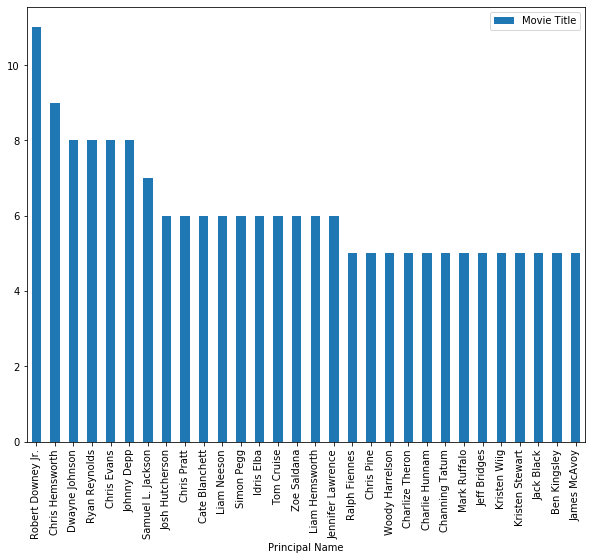

In [81]:
# create visualizations to show the top 20 actors in top 3 genres (Adventure, Sci-Fi, Action)
# start with Adventure!

df = find_principals('actor','Adventure', 30)

df.plot(kind='bar', figsize=(10,8))

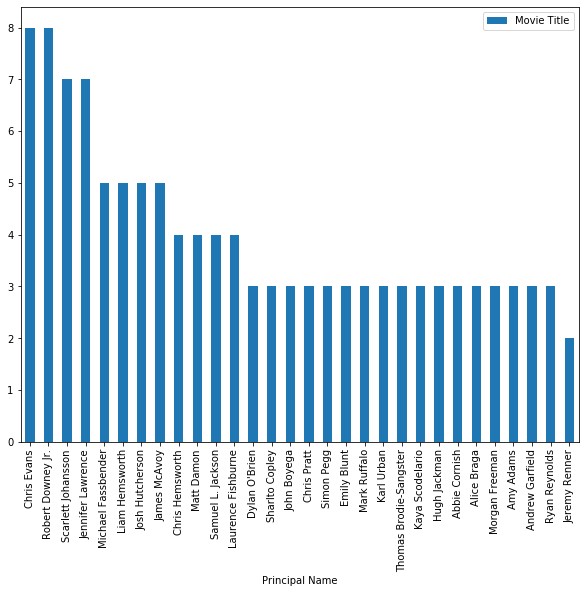

In [82]:
# now try Sci-Fi

df = find_principals('actor','Sci-Fi', 30)

df.plot(kind='bar', figsize=(10,8))

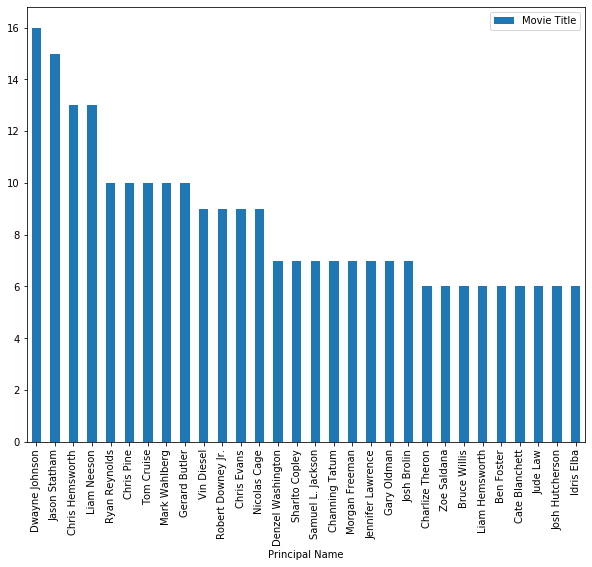

In [84]:
# now try Action

df = find_principals('actor','Action', 30)

df.plot(kind='bar', figsize=(10,8))

In [112]:
#clean up tmdb data

#drop unnecessary columns
tmdb_df = tmdb_df.drop(columns = ['Unnamed: 0','original_title','original_language','id'])

tmdb_df

,genre_ids,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...
26512,"[27, 18]",0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",0.600,2018-06-22,Trailer Made,0.0,1


In [113]:
#explore tmdb data

tmdb_df.describe() # shows that most movies have fewer than 28 votes
tmdb_df.quantile(0.86) # only around 14% of movies have more than 100 votes
tmdb_df.head()

#db is currently ordered by popularity
#popularity column seems to be a combo of vote_average and vote_count, but not sure what the formula is


,genre_ids,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,2010-07-16,Inception,8.3,22186


How TMDB calculates Popularity metric for movies:

Number of votes for the day
Number of views for the day
Number of users who marked it as a "favourite" for the day
Number of users who added it to their "watchlist" for the day
Release date
Number of total votes
Previous days score

In [114]:
#clean up tmdb data - drop rows with fewer than 100 votes

tmdb_df = tmdb_df.loc[tmdb_df['vote_count'] >= 100] 
tmdb_df.describe() #only 3686 movies remain

,popularity,vote_average,vote_count
count,3686.000000,3686.000000,3686.000000
mean,11.281023,6.389392,1325.535269
std,6.196958,0.862305,2270.643058
min,0.600000,2.000000,100.000000
25%,7.557750,5.800000,186.000000
50%,9.395000,6.400000,422.000000
75%,12.894000,7.000000,1306.000000
max,80.773000,8.600000,22186.000000


In [115]:
#clean up tmdb data - investigate dups
#(I also did a bit of dup investigation before removing rows with fewer than 100 votes.
#It didn't look like the same movies and votes counted differernt places - lines were exactly alike or not same movie)

tmdb_df.duplicated(keep = False).sum() # there are 615 dup rows
# tmdb_df['title'].duplicated(keep = False).sum() #there are 645 dup titles

#let's drop the dup rows since they are clearly the same movie
tmdb_df = tmdb_df.drop_duplicates(keep = 'first')

tmdb_df['title'].duplicated(keep = False).sum() #still 33 dup titles

tmdb_df['dup_title'] = tmdb_df['title'].duplicated(keep=False) # add a column showing whether title is a dup

#investigate remaining dup titles
tmdb_df_dups = (tmdb_df.loc[tmdb_df['dup_title'] == True]).sort_values(by=['title'])
tmdb_df_dups.head(50)
tmdb_df_dups.info()
#these are not the same movie, but must add year if joining on title.  They all have different years


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 11370 to 14240
Data columns (total 7 columns):
genre_ids       33 non-null object
popularity      33 non-null float64
release_date    33 non-null object
title           33 non-null object
vote_average    33 non-null float64
vote_count      33 non-null int64
dup_title       33 non-null bool
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 1.8+ KB


In [116]:
#create year column
tmdb_df['release_year'] = ((tmdb_df['release_date']).str[0:4]).astype(int)

# create title_year column for merge
tmdb_df['title_year'] = (tmdb_df['title'] + '_' + tmdb_df['release_year'].astype(str))
tmdb_df.head()

,genre_ids,popularity,release_date,title,vote_average,vote_count,dup_title,release_year,title_year
0,"[12, 14, 10751]",33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,False,2010,Harry Potter and the Deathly Hallows: Part 1_2010
1,"[14, 12, 16, 10751]",28.734,2010-03-26,How to Train Your Dragon,7.7,7610,False,2010,How to Train Your Dragon_2010
2,"[12, 28, 878]",28.515,2010-05-07,Iron Man 2,6.8,12368,False,2010,Iron Man 2_2010
3,"[16, 35, 10751]",28.005,1995-11-22,Toy Story,7.9,10174,False,1995,Toy Story_1995
4,"[28, 878, 12]",27.920,2010-07-16,Inception,8.3,22186,False,2010,Inception_2010


In [117]:
#Clean up tn_budgets_df

#looks like the data is organized in order of production budget
#the data has no null values, but that doesn't mean it doesn't have placeholders.  I don't see any at first blush
#it does look like there is a problem with apostrophes.  They render as funny characters
#example: # Pirates of the Caribbean: Dead Manâs Chest
#some foreign characters also don't render correctly, like the c in fiance
# the id column is weird, it repeats every 100
#so to clean, take movies from last 20 years, nix id column, and find a way to replace apostrophes?

#first, make a year column.  currently the date is a string.  then, restrict year to >= 2000
tn_budgets_df['release_year'] = ((tn_budgets_df['release_date']).str.slice(start=-4)).astype(int) #create release_year column
tn_budgets_df = tn_budgets_df.loc[tn_budgets_df['release_year'] >= 2000] # change df to only include movies from 2000 on

tn_budgets_df.drop(columns = ['id'], inplace=True) #drop 'id' column

tn_budgets_df['movie'].replace(to_replace='â', value = "'") #replace with regular apostrophes.  It doesn't work, the weird characters don't get replaced
# print(tn_budgets_df.loc[(tn_budgets_df['movie']).str.contains("'")]) #checking to see if apostrophes are there
# print(tn_budgets_df.loc[(tn_budgets_df['movie']).str.contains('â')]) # but movies with the weird apostrophe are still here too!
#maybe it's not a big deal - there are only 40 movies with the weird character
#checked to see if compression=gzip fixed the apostrophe issue, it does not

#reset index and drop old index column:
tn_budgets_df.reset_index(inplace=True) 
tn_budgets_df.drop(columns = ['index'], inplace=True)

#cast numeric columns as int
tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'].str.replace('$','').str.replace(',','').astype(int)

tn_budgets_df.info()
# tn_budgets_df.describe()
# tn_budgets_df.head()
# tn_budgets_df[500:550]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 6 columns):
release_date         4387 non-null object
movie                4387 non-null object
production_budget    4387 non-null int64
domestic_gross       4387 non-null object
worldwide_gross      4387 non-null object
release_year         4387 non-null int64
dtypes: int64(2), object(4)
memory usage: 205.8+ KB


In [91]:
#function to cast numeric columns as int.  #but it didn't work.  why?
def convert_to_int(column):
    column = column.str.replace('$','').str.replace(',','').astype(int)

In [92]:
#testing function.  did not work
convert_to_int(tn_budgets_df['domestic_gross'])
convert_to_int(tn_budgets_df['worldwide_gross'])

In [93]:
#convert these columns anyway
tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)

In [94]:
tn_budgets_df.info()
# tn_budgets_df.describe()
# tn_budgets_df.head(50)
# tn_budgets_df[500:550]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 6 columns):
release_date         4387 non-null object
movie                4387 non-null object
production_budget    4387 non-null int64
domestic_gross       4387 non-null int64
worldwide_gross      4387 non-null int64
release_year         4387 non-null int64
dtypes: int64(4), object(2)
memory usage: 205.8+ KB


In [95]:
#checking tn_budgets_df for duplicates

tn_budgets_df.duplicated().sum() # no duplicate rows
tn_budgets_df['movie'].duplicated(keep = False).sum() # only 45 duplicate titles

#I should write a function for all the below, with inputs df and column name
tn_budgets_df['dup_title'] = tn_budgets_df['movie'].duplicated(keep=False) # add a column showing whether title is a dup

#investigate remaining dup titles
tn_budgets_df_dups = (tn_budgets_df.loc[tn_budgets_df['dup_title'] == True]).sort_values(by=['movie'])
tn_budgets_df_dups
# tn_budgets_df_dups.info()
#most are not the same movie, but must add year if joining on title.  
#The only one with the same year is "Home", possibly this is the same movie

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,dup_title
2577,"Aug 14, 2015",Brothers,13000000,656688,17856688,2015,True
1715,"Dec 4, 2009",Brothers,26000000,28544157,45043870,2009,True
2524,"Dec 31, 2008",Ca$h,13700000,0,11738256,2008,True
3126,"Mar 26, 2010",Ca$h,7000000,46488,46488,2010,True
4160,"Jun 23, 2015",Crossroads,500000,0,0,2015,True
2615,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,2002,True
2099,"Aug 17, 2007",Death at a Funeral,20000000,8580428,46790428,2007,True
1956,"Apr 16, 2010",Death at a Funeral,21000000,42739347,48977233,2010,True
287,"Aug 7, 2015",Fantastic Four,120000000,56117548,167849187,2015,True
450,"Jul 8, 2005",Fantastic Four,87500000,154696080,333132750,2005,True


In [96]:
#clean up tn_budgets_df data - add a column for joining
tn_budgets_df['title_year'] = (tn_budgets_df['movie'] + '_' + tn_budgets_df['release_year'].astype(str))
tn_budgets_df.head(200)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,dup_title,title_year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,False,Avatar_2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,False,Pirates of the Caribbean: On Stranger Tides_2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,False,Dark Phoenix_2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,False,Avengers: Age of Ultron_2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,False,Star Wars Ep. VIII: The Last Jedi_2017
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,False,Star Wars Ep. VII: The Force Awakens_2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,False,Avengers: Infinity War_2018
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007,False,Pirates of the Caribbean: At Worldâs End_2007
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,False,Justice League_2017
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,False,Spectre_2015


In [98]:
#join budgets table to TMDB, to get TMDB ratings

merge_df = pd.merge(tn_budgets_df, tmdb_df, left_on=  ['title_year'],
                   right_on= ['title_year'], 
                   how = 'inner')

# merge_df.info()
merge_df.tail(200)

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_year_x,dup_title_x,title_year,genre_ids,popularity,release_date_y,title,vote_average,vote_count,dup_title_y,release_year_y
1121,"Nov 30, 2018",The Possession of Hannah Grace,6000000,14836174,42785387,2018,False,The Possession of Hannah Grace_2018,"[27, 18]",20.263,2018-11-30,The Possession of Hannah Grace,5.1,393,False,2018
1122,"Sep 7, 2012",The Words,6000000,11494838,16369708,2012,False,The Words_2012,"[18, 53]",7.201,2012-09-07,The Words,6.6,628,False,2012
1123,"Apr 27, 2012",Bernie,6000000,9204489,10106975,2012,False,Bernie_2012,"[35, 80, 18]",7.518,2012-04-27,Bernie,6.6,503,False,2012
1124,"Jul 29, 2011",The Guard,6000000,5359774,21197454,2011,False,The Guard_2011,"[28, 35, 53, 80]",10.177,2011-07-29,The Guard,6.9,563,False,2011
1125,"Jul 18, 2014",Wish I Was Here,6000000,3591299,6591365,2014,False,Wish I Was Here_2014,"[18, 35]",7.845,2014-01-18,Wish I Was Here,6.6,440,False,2014
1126,"Mar 14, 2014",Veronica Mars,6000000,3322127,3485383,2014,False,Veronica Mars_2014,"[35, 18, 80]",7.821,2014-03-14,Veronica Mars,6.7,699,False,2014
1127,"Sep 14, 2018",Mandy,6000000,1214525,1427656,2018,False,Mandy_2018,"[28, 53, 27, 14, 9648]",16.240,2018-09-13,Mandy,6.2,618,False,2018
1128,"Dec 7, 2012",Deadfall,6000000,66351,1673635,2012,False,Deadfall_2012,"[80, 18, 53]",9.491,2012-12-07,Deadfall,5.9,357,False,2012
1129,"Jan 23, 2015",Song One,6000000,32251,437089,2015,False,Song One_2015,[18],6.206,2015-01-23,Song One,5.6,126,False,2015
1130,"May 10, 2011",The Hit List,6000000,0,0,2011,False,The Hit List_2011,"[28, 53]",6.241,2011-04-03,The Hit List,5.4,116,False,2011


In [25]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [26]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***